# Happy or Sad Face Image Classifier Model #

## Import Libraries ##

In [17]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

C:\Users\gavvi\AppData\Local\Temp\ipykernel_31924\183779410.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [37]:
def PRINT(text) -> None: print(f"{80*'-'}\n{text}\n{80*'-'}")

## Get Data ##

The first step is to get data. Our data is going to be taked from websites like *Google*. One simple way is just to search for happy/sad people pictures. 

Next we can use *Download All Images* extension which can be downloaded easily from the extenstion. That extension makes the process of downloading images from google much easier.

## Remove Redundant File ##

The next step is to remove redundant file, i.e., file which not one of the images format files (.jpg , .png ...). 

We saw that there are lots of *.svg* files. In order to remove those files we will run the command : `rm *.svg` from the command line which was opened from the wanted directory (*happy* or *sad* directory)

## Remove Small Images ##

The next step is to remove all of the images that are of the size lower that 9kb. The way we are going to achive that is by running the commad:

`Get-ChildItem | Where-Object { $_.Length -lt 9216 } | Remove-Item`

from the command line which was opened again from the wanted directory.

In [67]:
data_dir = 'data'

image_exts = ['jpeg','jpg', 'bmp', 'png']

In [68]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print(e)
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\happy\happy-home.jpg
Image not in ext list data\sad\182c9f72579b4bc6a5f2da710cba7918.webp
Image not in ext list data\sad\713b3140ec884011bac5813ea28d0f24.webp
Image not in ext list data\sad\close-sad-female-human-face-footage-147131792_prevstill.jpeg
Image not in ext list data\sad\depositphotos_218926250-stock-photo-human-face-can-different-strong.jpg
Image not in ext list data\sad\depositphotos_2444604-stock-photo-very-sad-little-boy.jpg
Image not in ext list data\sad\fddbda04f5304f4ba58e2cde8311dd54.webp


## Load Data ##

In [19]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 171 files belonging to 2 classes.


In [20]:
data_iterator = data.as_numpy_iterator()

In [26]:
batch = data_iterator.next()

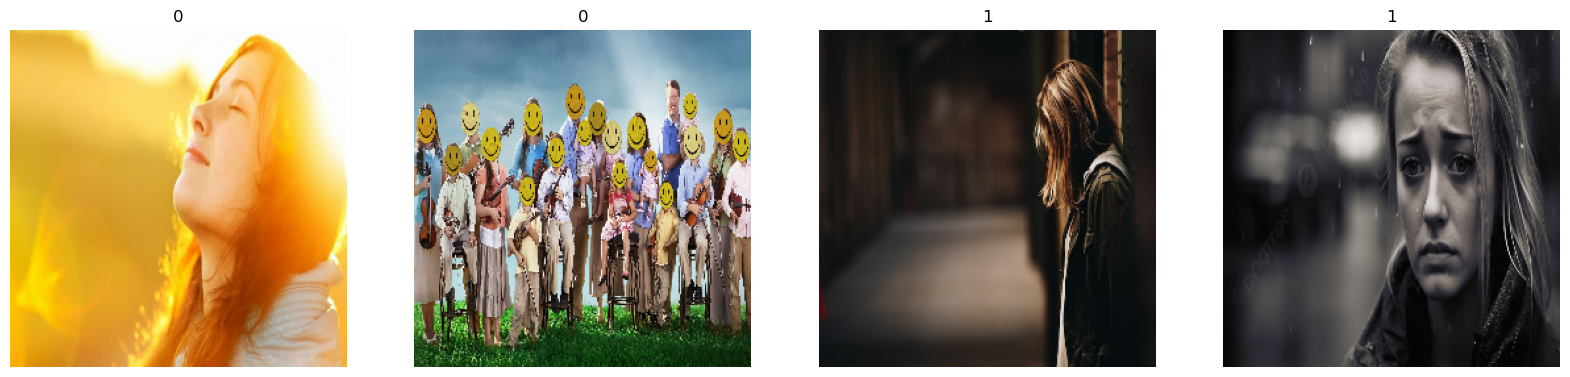

In [27]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    ax[idx].axis(False)

In [29]:
batch[0].shape

(32, 256, 256, 3)

In [40]:
for indx,val in enumerate(batch):
    if indx == 2 : 
        break
    PRINT(f'Image number {indx+1} from the first bach in tensor representation: {batch[0][indx]}\n\n And the corresponding class: {batch[1][indx]}')

--------------------------------------------------------------------------------
Image number 1 from the first bach in tensor representation: [[[227.       172.        46.      ]
  [228.14062  174.14062   48.140625]
  [230.9336   179.9336    51.933594]
  ...
  [253.       253.       253.      ]
  [253.       253.       253.      ]
  [253.       253.       253.      ]]

 [[227.69922  170.21484   45.04297 ]
  [227.44922  172.6211    46.621094]
  [228.04297  174.21484   47.871094]
  ...
  [253.       253.       253.      ]
  [253.       253.       253.      ]
  [253.       253.       253.      ]]

 [[228.01172  170.01172   45.01172 ]
  [227.75     172.75      46.75    ]
  [227.95312  172.95312   46.953125]
  ...
  [254.       254.       254.      ]
  [253.04688  253.04688  253.04688 ]
  [254.       254.       254.      ]]

 ...

 [[250.04688  171.04688   26.046875]
  [250.       172.        22.      ]
  [247.       172.        18.      ]
  ...
  [246.       175.        59.5     ]
  [248. 

## Preprocess Data ##

In order to improve our model efficiency, we will take few data preprocessing steps such as:

- Scale out Date: Scale the images from [0,255] -> [0.1]


In [30]:
data = data.map(lambda x,y: (x/255,y)) # x for images and y for labels, i.e, 0 haapy 1 sad

In [50]:
scaled_itr = data.as_numpy_iterator()

scaled_batch = scaled_itr.next()

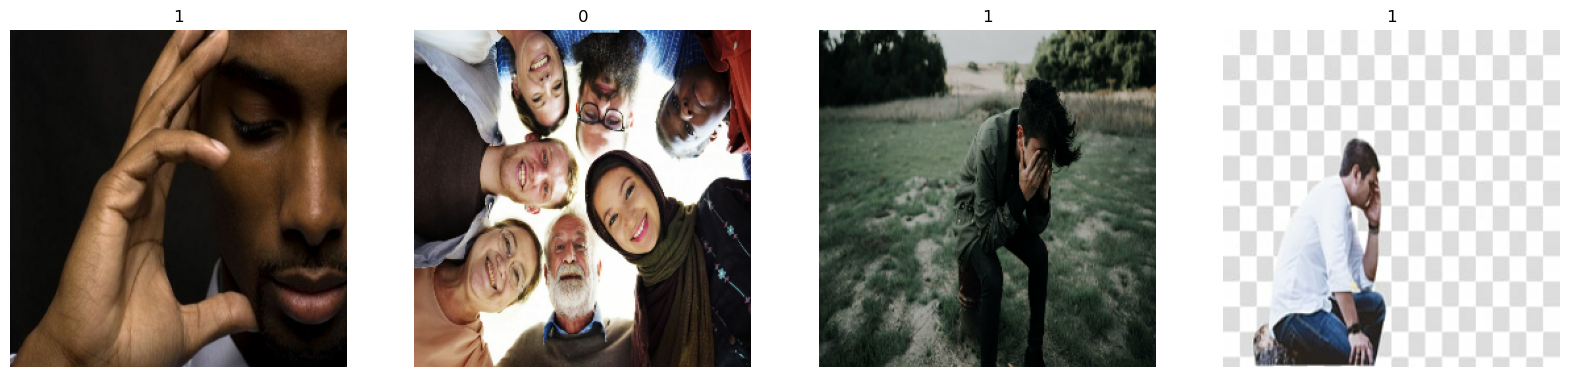

In [51]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(scaled_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(scaled_batch[1][idx])
    ax[idx].axis(False)

In [47]:
scaled_batch[0].max(), scaled_batch[0].min()

(1.0, 0.0)

### Split Data ###

In [52]:
# The size of train dataset
train_size = int(len(data)*.7)

# The size of validation dataset
val_size = int(len(data)*.2)+1

# The size of test dataset
test_size = int(len(data)*.1)+1

In [54]:
# Define train dataset
train = data.take(train_size)

# Define validation dataset
val = data.skip(train_size).take(val_size)

# Define test dataset
test= data.skip(train_size + val_size).take(test_size)

## Building our Deep Learning Model ##

### Import Libraries ###

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [63]:
model = Sequential()

In [64]:
model.add(Conv2D(32, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3), 1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))  # Adjust the dropout rate as needed
model.add(Dense(1, activation='sigmoid'))

In [66]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])